In [375]:
import pandas as pd
import numpy as np
import io 
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm 
import re
from scipy.stats import f 
from statsmodels.iolib.summary2 import summary_col
from statsmodels.iolib.summary2 import summary_params 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Credit Risk

### В данной работе мы рассмотрим зависимость размера кредита от разных факторов.

In [548]:
df = pd.read_csv ('https://raw.githubusercontent.com/AnnaSaakyan/AnnaS-Econometrica/main/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


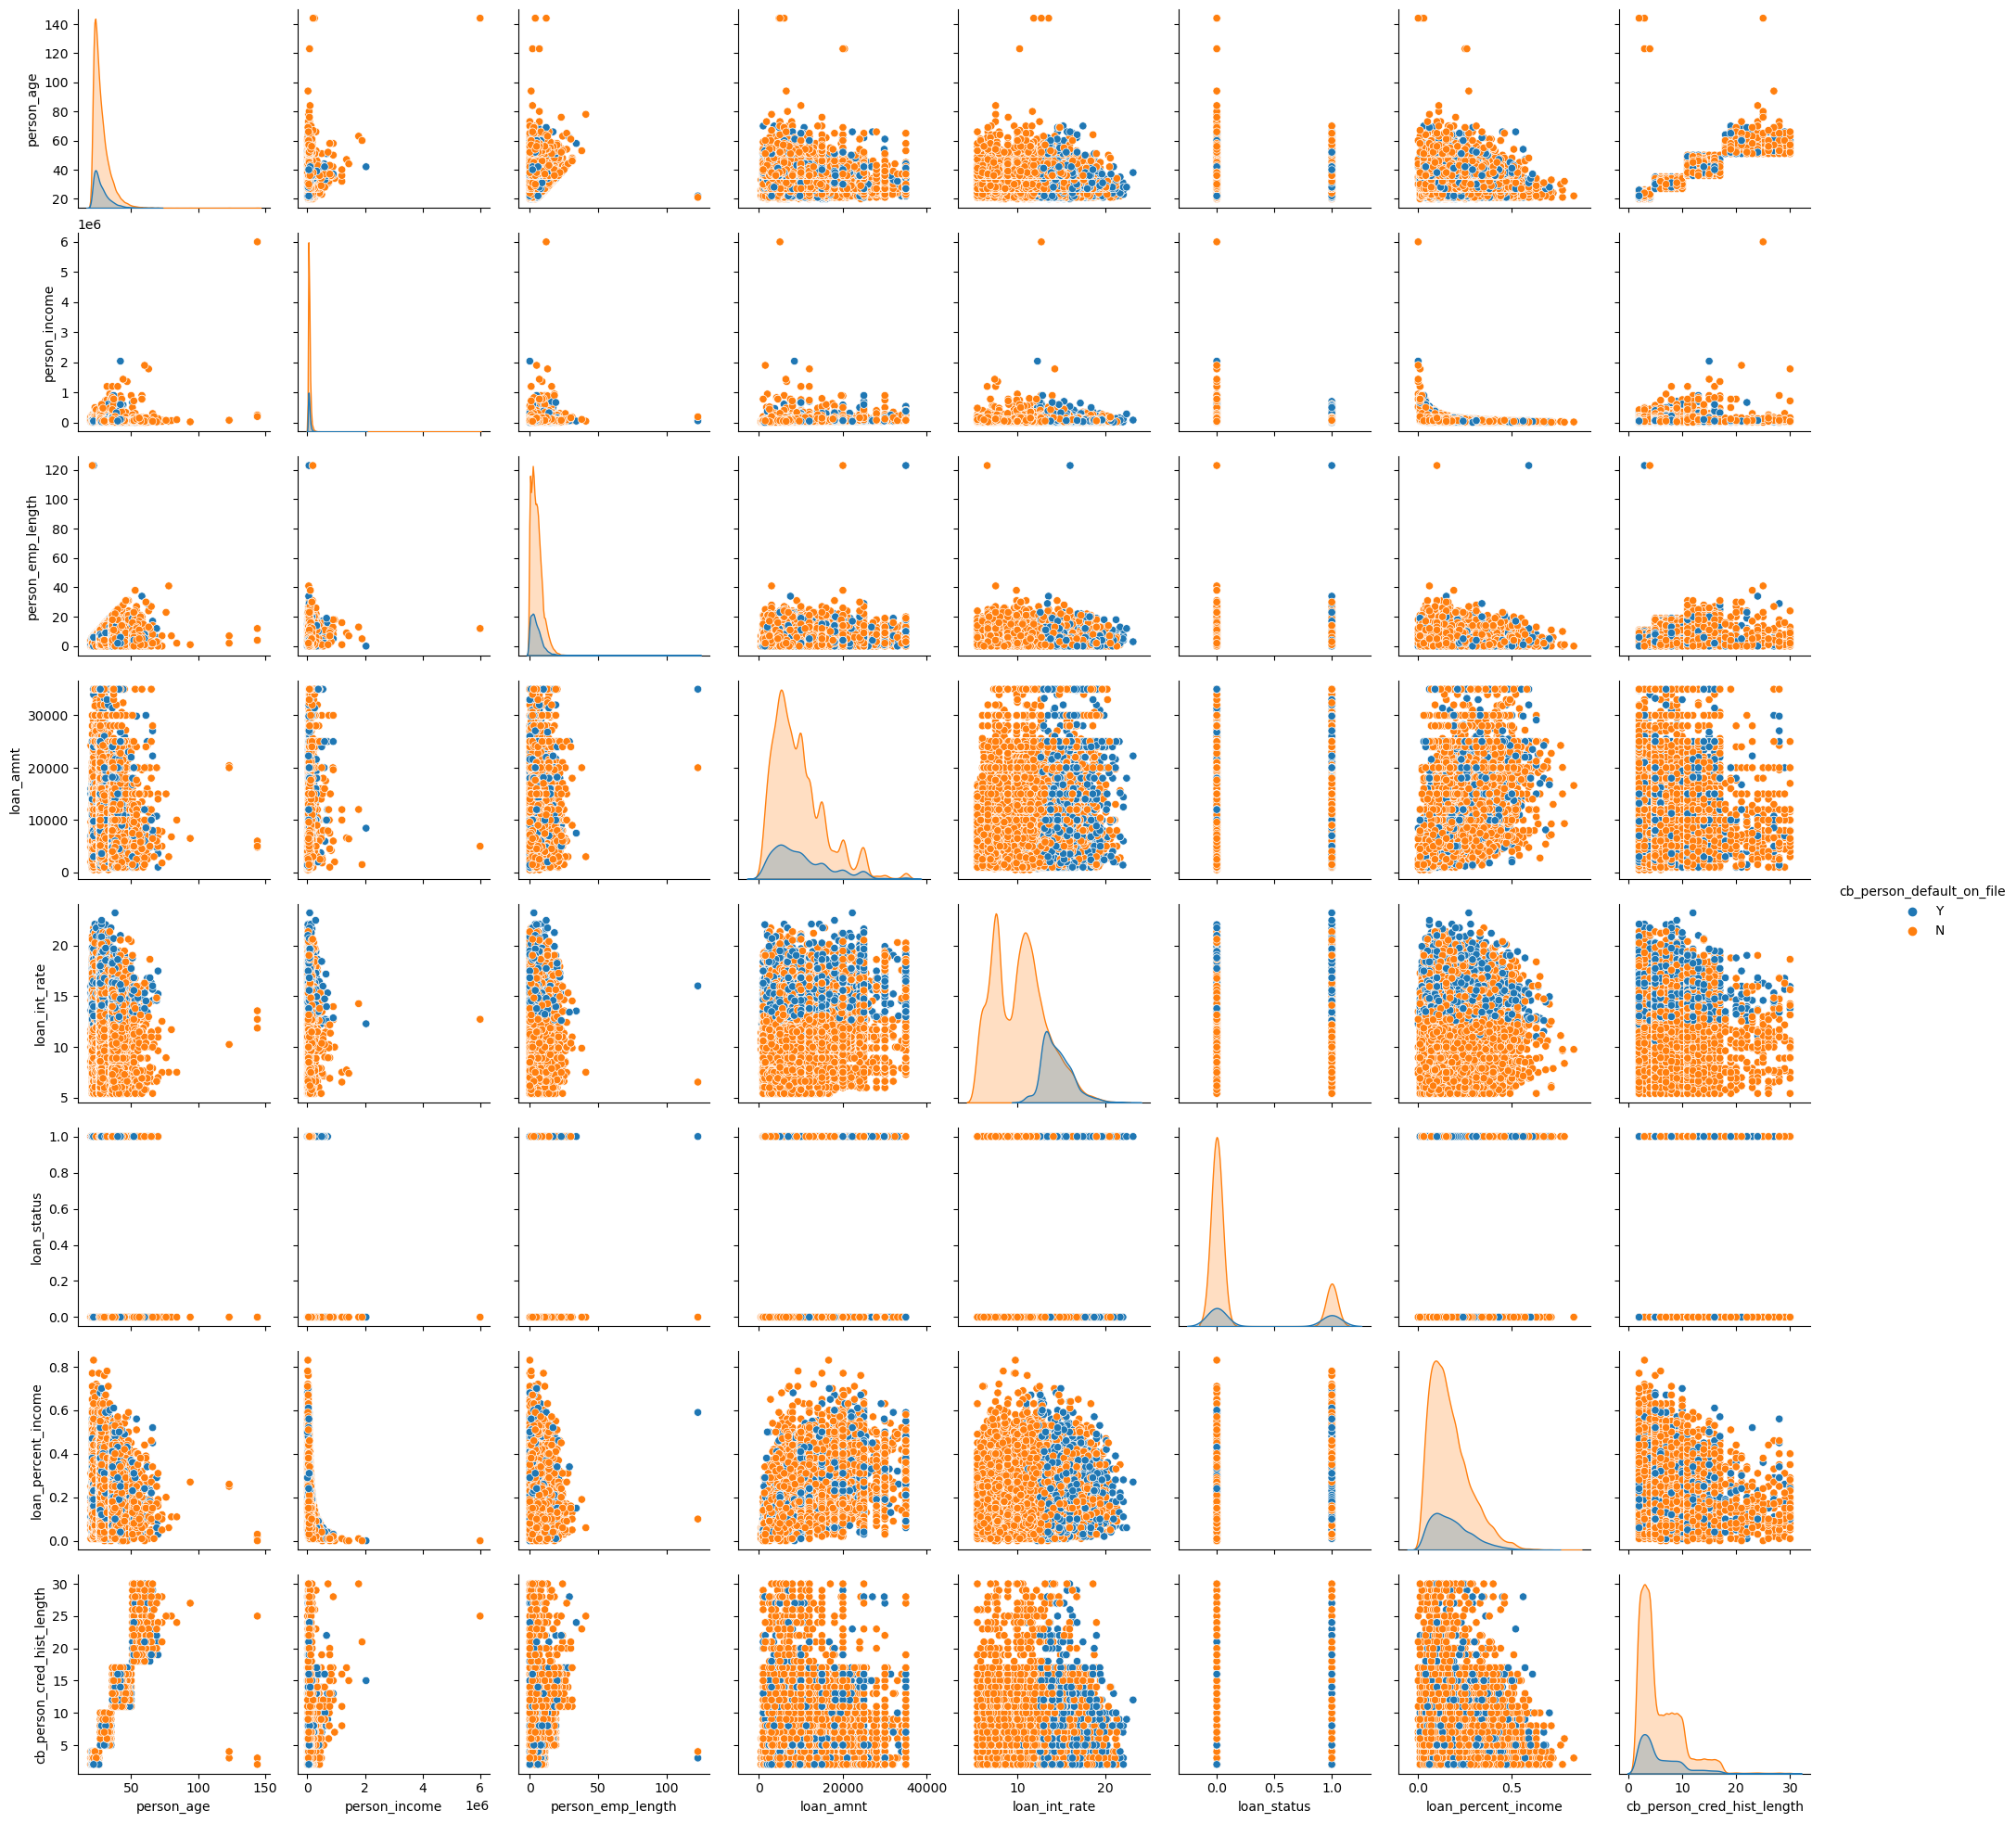

In [459]:
sns.pairplot(df, hue = 'cb_person_default_on_file')
plt.show(sns)

In [549]:
df ['PersonDefault'] = df.apply (lambda x: '1' if x['cb_person_default_on_file']=='Y' else '0', axis = 1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,PersonDefault
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,0


In [550]:
df=df.drop(columns = 'cb_person_default_on_file')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,PersonDefault
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,0


In [551]:
df = df.rename (columns={'person_age':'PersonAge','person_income':'PersonIncome','loan_amnt':'LoanAmnt','loan_int_rate':'LoanInterestRate', 'cb_person_cred_hist_length':'CredHist','person_emp_length': 'EmpLength'})
df

,PersonAge,PersonIncome,person_home_ownership,EmpLength,loan_intent,loan_grade,LoanAmnt,LoanInterestRate,loan_status,loan_percent_income,CredHist,PersonDefault
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,0


## Спецификация
$$
LoanAmnt = \beta_0+\beta_1*PersonIncome+\beta_2*LoanInterestRate+\beta_3*CredHist+\beta_4*PersonDefault+\beta_5*EmpLength+\beta_6*PersonAge
$$

In [334]:
# специфицируем модель через формулу
loan = smf.ols(formula='LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge', data=df).fit()
# Коэфициенты модели с округление
loan.params.round(2)

Intercept             4290.44
PersonDefault[T.1]    -708.89
PersonIncome             0.03
LoanInterestRate       337.98
CredHist                41.27
EmpLength              129.98
PersonAge              -30.17
dtype: float64

1. При увеличении годового дохода на 1 доллар, сумма кредита увеличивается на 0.03 доллара, при прочих равных.
2. При увеличении кредитной истории на 1 год, сумма кредита увеличивается на 41.27 долларов.
3. С увеличением процентной ставки на 1 %, сумма кредита увеличивается на 337.98 долларов.
4. При увеличении стажа работы на 1 год, сумма кредита увеличивается на 129.98 доллара.
5. При увеличении возраста на 1 год, сумма кредита уменьшается на 30.17 долларов.
6. У людей, по которым есть данные о неисполнении долговых обязательств, сумма кредита меньше на 708.89 долларов.

## Значимость коэффициентов (t-тест)

In [339]:
model_loan = smf.ols(formula='LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge', data=df).fit()

In [340]:
model_loan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LoanAmnt   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     534.2
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        14:21:19   Log-Likelihood:            -2.8978e+05
No. Observations:               28638   AIC:                         5.796e+05
Df Residuals:                   28631   BIC:                         5.796e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4290.4449    264.581     16.216      0.000    3771.854    4809.036
PersonDefault[T.1]  -708.8884    107.062     -6.621      0.000    -918.735    -499.042
PersonIncome           0.0260      0.001     44.651      0.000       0.025       0.027
LoanInterestRate     337.9836     12.705     26.603      0.000     313.082     362.885
CredHist              41.2702     17.238      2.394      0.017       7.484      75.057
EmpLength            129.9754      8.728     14.891      0.000     112.868     147.083
PersonAge            -30.1741     11.154     -2.705      0.007     -52.037      -8.311
==============================================================================
Omnibus:                     6981.171   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           394899.378
Skew:                           0.250   Prob(JB):                         0.00
Kurtosis:                      21.185   Cond. No.                     6.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
model_loan.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4290.4449,264.581,16.216,0.000,3771.854,4809.036
PersonDefault[T.1],-708.8884,107.062,-6.621,0.000,-918.735,-499.042
PersonIncome,0.0260,0.001,44.651,0.000,0.025,0.027
LoanInterestRate,337.9836,12.705,26.603,0.000,313.082,362.885
CredHist,41.2702,17.238,2.394,0.017,7.484,75.057
EmpLength,129.9754,8.728,14.891,0.000,112.868,147.083
PersonAge,-30.1741,11.154,-2.705,0.007,-52.037,-8.311


## Тестируем гипотезу
$$
H_0: \beta_j=0 \\
H_1: \beta_j \neq 0 
$$

In [342]:
date_string = '''
Names	coef	std.err	t	P>|t|	[0.025	0.975]
Intercept	4290.4449	264.581	16.216	0.000	3771.854	4809.036
PersonDefault[T.1]	-708.8884	107.062	-6.621	0.000	-918.735	-499.042
PersonIncome	0.0260	0.001	44.651	0.000	0.025	0.027
LoanInterestRate	337.9836	12.705	26.603	0.000	313.082	362.885
CredHist	41.2702	17.238	2.394	0.017	7.484	75.057
person_emp_length	129.9754	8.728	14.891	0.000	112.868	147.083
PersonAge	-30.1741	11.154	-2.705	0.007	-52.037	-8.311

'''
date_string

'\nNames\tcoef\tstd.err\tt\tP>|t|\t[0.025\t0.975]\nIntercept\t4290.4449\t264.581\t16.216\t0.000\t3771.854\t4809.036\nPersonDefault[T.1]\t-708.8884\t107.062\t-6.621\t0.000\t-918.735\t-499.042\nPersonIncome\t0.0260\t0.001\t44.651\t0.000\t0.025\t0.027\nLoanInterestRate\t337.9836\t12.705\t26.603\t0.000\t313.082\t362.885\nCredHist\t41.2702\t17.238\t2.394\t0.017\t7.484\t75.057\nperson_emp_length\t129.9754\t8.728\t14.891\t0.000\t112.868\t147.083\nPersonAge\t-30.1741\t11.154\t-2.705\t0.007\t-52.037\t-8.311\n\n'

In [343]:
df_l = pd.read_csv(io.StringIO(date_string), sep='\s+')
df_l

,Names,coef,std.err,t,P>|t|,[0.025,0.975]
0,Intercept,4290.4449,264.581,16.216,0.000,3771.854,4809.036
1,PersonDefault[T.1],-708.8884,107.062,-6.621,0.000,-918.735,-499.042
2,PersonIncome,0.0260,0.001,44.651,0.000,0.025,0.027
3,LoanInterestRate,337.9836,12.705,26.603,0.000,313.082,362.885
4,CredHist,41.2702,17.238,2.394,0.017,7.484,75.057
5,person_emp_length,129.9754,8.728,14.891,0.000,112.868,147.083
6,PersonAge,-30.1741,11.154,-2.705,0.007,-52.037,-8.311


In [344]:
alpha = 0.05
t_crit= stats.t.ppf(1-alpha/2,28638-7)
round (t_crit, 3)

1.96

In [345]:
df_l['Znachimost'] = df_l.apply(lambda x: 'znachim' if np.abs(x['t'])>t_crit else 'ne znachim', axis=1 )
df_l

,Names,coef,std.err,t,P>|t|,[0.025,0.975],Znachimost
0,Intercept,4290.4449,264.581,16.216,0.000,3771.854,4809.036,znachim
1,PersonDefault[T.1],-708.8884,107.062,-6.621,0.000,-918.735,-499.042,znachim
2,PersonIncome,0.0260,0.001,44.651,0.000,0.025,0.027,znachim
3,LoanInterestRate,337.9836,12.705,26.603,0.000,313.082,362.885,znachim
4,CredHist,41.2702,17.238,2.394,0.017,7.484,75.057,znachim
5,person_emp_length,129.9754,8.728,14.891,0.000,112.868,147.083,znachim
6,PersonAge,-30.1741,11.154,-2.705,0.007,-52.037,-8.311,znachim


### Итак, все регрессоры в модели значимы.

## F-тест: значимость регрессии

In [346]:
model_loan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LoanAmnt   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     534.2
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        14:24:32   Log-Likelihood:            -2.8978e+05
No. Observations:               28638   AIC:                         5.796e+05
Df Residuals:                   28631   BIC:                         5.796e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4290.4449    264.581     16.216      0.000    3771.854    4809.036
PersonDefault[T.1]  -708.8884    107.062     -6.621      0.000    -918.735    -499.042
PersonIncome           0.0260      0.001     44.651      0.000       0.025       0.027
LoanInterestRate     337.9836     12.705     26.603      0.000     313.082     362.885
CredHist              41.2702     17.238      2.394      0.017       7.484      75.057
EmpLength            129.9754      8.728     14.891      0.000     112.868     147.083
PersonAge            -30.1741     11.154     -2.705      0.007     -52.037      -8.311
==============================================================================
Omnibus:                     6981.171   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           394899.378
Skew:                           0.250   Prob(JB):                         0.00
Kurtosis:                      21.185   Cond. No.                     6.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Тестируем гипотезу

$$ H_0: \beta_{0}=\beta_{1} = \dots = \beta_{k} = 0 $$
$$ H_1: \beta_{0}^2+\beta_{1}^2 + \dots +\beta_{k}^2 > 0 $$

In [351]:
model_loan.fvalue

534.1840177467631

In [353]:
model_loan.f_pvalue

0.0

In [357]:
F_cr = f.ppf(q=1-0.05, dfn=model_loan.df_model, dfd=model_loan.df_resid)
F_cr

2.0989127696772507

### Вывод: регрессия значима

## F-тест: совместная значимость

## Тестируем гипотезу
$$ H_0: \beta_{PersonIncome} = \beta_{LoanInterestRate} = \beta_{CredHist}= \beta_{PersonDefault} = \beta_{EmpLength}=\beta_{PersonAge}=0 $$
$$ H_1: \beta_{PersonIncome}^2 + \beta_{LoanInterestRate}^2 +\beta_{CredHist}^2 +\beta_{PersonDefault}^2+\beta_{EmpLength}^2+\beta_{PersonAge}^2> 0 $$

In [358]:
model_loan_unrest = smf.ols(formula='LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge+loan_status+loan_percent_income', data=df).fit()
model_loan_unrest.params.round(3)

Intercept              -2279.241
PersonDefault[T.1]      -256.633
PersonIncome               0.043
LoanInterestRate         224.238
CredHist                  59.867
EmpLength                136.946
PersonAge                -43.427
loan_status            -2019.184
loan_percent_income    43064.527
dtype: float64

In [359]:
R2 = model_loan_unrest.rsquared.round(3)
R2

0.54

In [360]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.54          0.101'))
print (unrest, rest)

0.54 0.101


In [361]:
F_obs = (unrest-rest)/(1-unrest)*(28638-9)/7
round (F_obs,3)

3903.146

In [392]:
alpha = 0.05
F_cr=stats.f.ppf(1-alpha,7, 28638-9)
round (F_cr,3)

2.01

### $ F_{obs}> F_{cr}$ следовательно данные согласуются с гипотезой $H_{1}$. Коэффициенты совместно значимы.

## F-тест: структурные изменения/сдвиги

Рассмотрим регрессию LoanAmnt на PersonIncome, LoanInterestRate, CredHist, PersonDefault, EmpLength, PersonAge

для тех, кто не возвратил кредит $$ LoanAmnt = \beta_0+\beta_1*PersonIncome+\beta_2*LoanInterestRate+\beta_3*CredHist+\beta_4*PersonDefault+\beta_5*EmpLength+\beta_6*PersonAge $$
для тех, кто возвратил кредит $$ LoanAmnt = \gamma_0+\gamma_1*PersonIncome+\gamma_2*LoanInterestRate+\gamma_3*CredHist+\gamma_4*PersonDefault+\gamma_5*EmpLength+\gamma_6*PersonAge $$
Тестируем гипоетзу $$
H_0: \beta_j=\gamma_j \\
H_1: \beta_j \neq \gamma_j$$

In [363]:
# Отфильтруем датафрейм по состоянию кредита
loan_default =df[df['loan_status']==1] # Датафрейм для невозвращенного кредита
loan_nondefault = df[df['loan_status']==0] # Датафрейм для возвращенного кредита

In [383]:
model_loan = smf.ols(formula='LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge', data=df).fit()

In [384]:
model_loan.params.round(3)

Intercept             4290.445
PersonDefault[T.1]    -708.888
PersonIncome             0.026
LoanInterestRate       337.984
CredHist                41.270
EmpLength              129.975
PersonAge              -30.174
dtype: float64

In [385]:
RSS = model_loan.ssr.round(3)
RSS

1031829857480.227

In [386]:
model_loan_de = smf.ols(formula='LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge', data=loan_default).fit()

In [387]:
RSS = model_loan_de.ssr.round(3)
RSS

258433051117.344

In [388]:
model_loan_nonde = smf.ols(formula='LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge', data=loan_default).fit()

In [389]:
RSS = model_loan_nonde.ssr.round(3)
RSS

258433051117.344

In [390]:
print(f'RSS:{model_loan.ssr.round(2)}, RSS default:{model_loan_de.ssr.round(2)},RSS nondefault:{model_loan_nonde.ssr.round(2)} ')

RSS:1031829857480.23, RSS default:258433051117.34,RSS nondefault:258433051117.34 


In [391]:
F_nabl = (model_loan.ssr - (model_loan_de.ssr + model_loan_nonde.ssr))/(model_loan_de.ssr + model_loan_nonde.ssr) * (len(loan_default) + len(loan_nondefault) - 2 *7)/(7)
F_nabl.round(2)

4635.31

In [393]:
alpha=0.05
F_cr = stats.f.ppf(1-alpha, 7, 28638-7)
F_cr.round (3)

2.01

Вывод: $F_{nabl}> F_{cr}$ данные согласуются с  гипотезой $H_1$. Структурные различия значимы.

## Построение доверительных интервалов

In [295]:
df_l['left'] = (df_l['coef'] - t_crit*df_l['std.err']).round(3)
df_l['right'] = (df_l['coef'] + t_crit*df_l['std.err']).round(3)
df_l

,Names,coef,std.err,t,P>|t|,[0.025,0.975],Znachimost,left,right
0,Intercept,4290.4449,264.581,16.216,0.000,3771.854,4809.036,znachim,3771.854,4809.036
1,PersonDefault[T.1],-708.8884,107.062,-6.621,0.000,-918.735,-499.042,znachim,-918.735,-499.042
2,PersonIncome,0.0260,0.001,44.651,0.000,0.025,0.027,znachim,0.024,0.028
3,LoanInterestRate,337.9836,12.705,26.603,0.000,313.082,362.885,znachim,313.081,362.886
4,CredHist,41.2702,17.238,2.394,0.017,7.484,75.057,znachim,7.483,75.057
5,person_emp_length,129.9754,8.728,14.891,0.000,112.868,147.083,znachim,112.868,147.083
6,PersonAge,-30.1741,11.154,-2.705,0.007,-52.037,-8.311,znachim,-52.036,-8.312


## Прогнозирование

### Рассморим трёх людей со следующими характеристиками

In [422]:
new_df = pd.DataFrame( { 'PersonIncome': [59000, 9600, 9600], 
                        'LoanInterestRate': [16.02, 11.14, 12.87], 'CredHist': [3, 2, 3], 'EmpLength': [123.0, 5.0, 1.0], 'PersonAge': [22, 21, 25],'PersonDefault': ['1', '0', '0'] } )
new_df

,PersonIncome,LoanInterestRate,CredHist,EmpLength,PersonAge,PersonDefault
0,59000,16.02,3,123.0,22,1
1,9600,11.14,2,5.0,21,0
2,9600,12.87,3,1.0,25,0


In [423]:
model_loanpre = model_loan.predict(exog=new_df, transform=True)
model_loanpre.round(2).to_frame(name='Прогноз')

,Прогноз
0,25979.94
1,8404.42
2,8389.80


## Мультиколлинеарность

In [315]:
model = smf.ols(data = df, formula = 'LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge').fit()
#основная регрессия
model_1 = smf.ols(data = df , formula = 'LoanInterestRate~PersonIncome+LoanAmnt+CredHist+PersonDefault+EmpLength+PersonAge').fit()
model_2 = smf.ols(data = df , formula = 'PersonIncome~ LoanAmnt+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge').fit()
model_3 = smf.ols(data = df , formula = 'CredHist~PersonIncome+LoanInterestRate+LoanAmnt+PersonDefault+EmpLength+PersonAge').fit()
model_1.params.round(3)

Intercept             9.845
PersonDefault[T.1]    4.159
PersonIncome         -0.000
LoanAmnt              0.000
CredHist              0.013
EmpLength            -0.044
PersonAge             0.000
dtype: float64

In [316]:
model_2.params.round(3)

Intercept            -17430.192
PersonDefault[T.1]     1244.568
LoanAmnt                  2.499
LoanInterestRate       -742.097
CredHist              -2156.333
EmpLength              1232.600
PersonAge              2687.211
dtype: float64

In [317]:
model_3.params.round(3)

Intercept            -9.542
PersonDefault[T.1]   -0.015
PersonIncome         -0.000
LoanInterestRate      0.007
LoanAmnt              0.000
EmpLength             0.008
PersonAge             0.554
dtype: float64

In [318]:
VIF_LoanInterestRate= 1/(1-model_1.rsquared)
VIF_LoanInterestRate. round(2)

1.37

In [319]:
VIF_PersonIncome= 1/(1-model_2.rsquared)
VIF_PersonIncome. round(2)

1.12

In [320]:
VIF_CredHist= 1/(1-model_3.rsquared)
VIF_CredHist. round(2)

3.85

In [433]:
# Матрица корреляций
df = df[['LoanInterestRate', 'PersonIncome', 'CredHist', 'EmpLength', 'PersonAge']].copy()
corr_matrix = df.corr().round(3) 
corr_matrix

,LoanInterestRate,PersonIncome,CredHist,EmpLength,PersonAge
LoanInterestRate,1.000,0.001,0.017,-0.056,0.013
PersonIncome,0.001,1.000,0.118,0.134,0.173
CredHist,0.017,0.118,1.000,0.145,0.859
EmpLength,-0.056,0.134,0.145,1.000,0.163
PersonAge,0.013,0.173,0.859,0.163,1.000


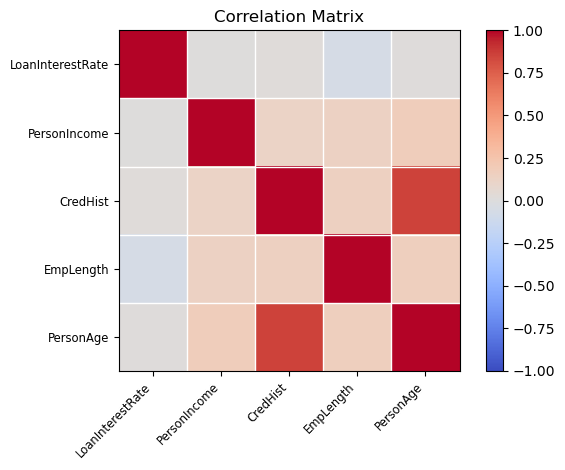

In [453]:
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, cmap='coolwarm')
plt.show()

## Небинарные качественные признаки

In [463]:
df

,PersonAge,PersonIncome,person_home_ownership,EmpLength,loan_intent,loan_grade,LoanAmnt,LoanInterestRate,loan_status,loan_percent_income,CredHist,PersonDefault
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,0


In [464]:
df.loc[:,['LoanAmnt','PersonIncome','LoanInterestRate','CredHist','EmpLength', 'PersonAge', 'person_home_ownership','loan_intent','loan_grade']]

,LoanAmnt,PersonIncome,LoanInterestRate,CredHist,EmpLength,PersonAge,person_home_ownership,loan_intent,loan_grade
0,35000,59000,16.02,3,123.0,22,RENT,PERSONAL,D
1,1000,9600,11.14,2,5.0,21,OWN,EDUCATION,B
2,5500,9600,12.87,3,1.0,25,MORTGAGE,MEDICAL,C
3,35000,65500,15.23,2,4.0,23,RENT,MEDICAL,C
4,35000,54400,14.27,4,8.0,24,RENT,MEDICAL,C
...,...,...,...,...,...,...,...,...,...
32576,5800,53000,13.16,30,1.0,57,MORTGAGE,PERSONAL,C
32577,17625,120000,7.49,19,4.0,54,MORTGAGE,PERSONAL,A
32578,35000,76000,10.99,28,3.0,65,RENT,HOMEIMPROVEMENT,B
32579,15000,150000,11.48,26,5.0,56,MORTGAGE,PERSONAL,B


In [474]:
df_all = pd.get_dummies(df.loc[:,['LoanAmnt','PersonIncome','LoanInterestRate','CredHist','EmpLength', 'PersonAge', 'person_home_ownership','loan_intent','loan_grade']])
df_all

,LoanAmnt,PersonIncome,LoanInterestRate,CredHist,EmpLength,PersonAge,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,35000,59000,16.02,3,123.0,22,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,1000,9600,11.14,2,5.0,21,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,5500,9600,12.87,3,1.0,25,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,35000,65500,15.23,2,4.0,23,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,35000,54400,14.27,4,8.0,24,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,5800,53000,13.16,30,1.0,57,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
32577,17625,120000,7.49,19,4.0,54,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
32578,35000,76000,10.99,28,3.0,65,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
32579,15000,150000,11.48,26,5.0,56,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [468]:
df_all1 = pd.get_dummies(df.loc[:,['LoanAmnt','PersonIncome','LoanInterestRate','CredHist','EmpLength', 'PersonAge', 'person_home_ownership']])
df_all1

,LoanAmnt,PersonIncome,LoanInterestRate,CredHist,EmpLength,PersonAge,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,35000,59000,16.02,3,123.0,22,0,0,0,1
1,1000,9600,11.14,2,5.0,21,0,0,1,0
2,5500,9600,12.87,3,1.0,25,1,0,0,0
3,35000,65500,15.23,2,4.0,23,0,0,0,1
4,35000,54400,14.27,4,8.0,24,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
32576,5800,53000,13.16,30,1.0,57,1,0,0,0
32577,17625,120000,7.49,19,4.0,54,1,0,0,0
32578,35000,76000,10.99,28,3.0,65,0,0,0,1
32579,15000,150000,11.48,26,5.0,56,1,0,0,0


In [469]:
df_all2 = pd.get_dummies(df.loc[:,['LoanAmnt','PersonIncome','LoanInterestRate','CredHist','EmpLength', 'PersonAge', 'loan_intent']])
df_all2

,LoanAmnt,PersonIncome,LoanInterestRate,CredHist,EmpLength,PersonAge,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,35000,59000,16.02,3,123.0,22,0,0,0,0,1,0
1,1000,9600,11.14,2,5.0,21,0,1,0,0,0,0
2,5500,9600,12.87,3,1.0,25,0,0,0,1,0,0
3,35000,65500,15.23,2,4.0,23,0,0,0,1,0,0
4,35000,54400,14.27,4,8.0,24,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,5800,53000,13.16,30,1.0,57,0,0,0,0,1,0
32577,17625,120000,7.49,19,4.0,54,0,0,0,0,1,0
32578,35000,76000,10.99,28,3.0,65,0,0,1,0,0,0
32579,15000,150000,11.48,26,5.0,56,0,0,0,0,1,0


In [484]:
df_all3 = pd.get_dummies(df.loc[:,['LoanAmnt','PersonIncome','LoanInterestRate','CredHist','EmpLength', 'PersonAge', 'loan_grade']])
df_all3

,LoanAmnt,PersonIncome,LoanInterestRate,CredHist,EmpLength,PersonAge,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,35000,59000,16.02,3,123.0,22,0,0,0,1,0,0,0
1,1000,9600,11.14,2,5.0,21,0,1,0,0,0,0,0
2,5500,9600,12.87,3,1.0,25,0,0,1,0,0,0,0
3,35000,65500,15.23,2,4.0,23,0,0,1,0,0,0,0
4,35000,54400,14.27,4,8.0,24,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,5800,53000,13.16,30,1.0,57,0,0,1,0,0,0,0
32577,17625,120000,7.49,19,4.0,54,1,0,0,0,0,0,0
32578,35000,76000,10.99,28,3.0,65,0,1,0,0,0,0,0
32579,15000,150000,11.48,26,5.0,56,0,1,0,0,0,0,0


In [476]:
model = smf.ols(data = df_all, formula = 'LoanAmnt~PersonIncome+LoanInterestRate+CredHist+EmpLength+PersonAge+person_home_ownership_MORTGAGE+person_home_ownership_OTHER+person_home_ownership_OWN+person_home_ownership_RENT+loan_intent_DEBTCONSOLIDATION+loan_intent_EDUCATION+loan_intent_HOMEIMPROVEMENT+loan_intent_MEDICAL+loan_intent_PERSONAL+loan_intent_VENTURE+loan_grade_A+loan_grade_B+loan_grade_C+loan_grade_D+loan_grade_E+loan_grade_F+loan_grade_G').fit()
model.params

Intercept                         4840.842892
PersonIncome                         0.024216
LoanInterestRate                   216.218975
CredHist                            43.457224
EmpLength                          101.247502
PersonAge                          -29.463518
person_home_ownership_MORTGAGE    1686.032393
person_home_ownership_OTHER       1902.604131
person_home_ownership_OWN          679.310670
person_home_ownership_RENT         572.895697
loan_intent_DEBTCONSOLIDATION      773.403820
loan_intent_EDUCATION              771.307743
loan_intent_HOMEIMPROVEMENT       1155.031860
loan_intent_MEDICAL                642.936173
loan_intent_PERSONAL               722.791081
loan_intent_VENTURE                775.372214
loan_grade_A                     -1356.287650
loan_grade_B                      -492.384940
loan_grade_C                     -1684.848336
loan_grade_D                      -497.819392
loan_grade_E                      1032.187449
loan_grade_F                      

### Тестируем гипотезу 
$$ H_0: \beta_{person-home-ownership-MORTGAGE}=\beta_{person-home-ownership-OTHER}=\beta_{person-home-ownership-OWN}=\beta_{person-home-ownership-RENT} = 0 $$
$$ H_1: \beta_{person-home-ownership-MORTGAGE}^2+\beta_{person-home-ownership-OTHER}^2+\beta_{person-home-ownership-OWN}^2+\beta_{person-home-ownership-RENT}^2>0 $$

In [477]:
model.f_test('person_home_ownership_MORTGAGE=person_home_ownership_OTHER=person_home_ownership_OWN=person_home_ownership_RENT=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=96.25847454238007, p=1.695706327756676e-81, df_denom=2.86e+04, df_num=4>

In [479]:
alpha=0.05
F_cr =stats.f.ppf(1-alpha,4,len(df_all)-4).round(2)
F_cr

2.37

### $F_{cr}<F_{obs}$ Нулевую гипотезу о совместной незначимости коэффициентов отвергаем

### Тестируем гипотезу 
$$ H_0: \beta_{loan-intent-DEBTCONSOLIDATION}=\beta_{loan-intent-EDUCATION}=\beta_{loan-intent-HOMEIMPROVEMENT}=\beta_{loan-intent-MEDICAL } =\beta_{loan-intent-PERSONAL} =\beta_{loan-intent-VENTURE}=0 $$
$$ H_1: \beta_{loan-intent-DEBTCONSOLIDATION}^2+\beta_{loan-intent-EDUCATION}^2+\beta_{loan-intent-HOMEIMPROVEMENT}^2+\beta_{loan-intent-MEDICAL }^2+\beta_{loan-intent-PERSONAL}^2+\beta_{loan-intent-VENTURE}^2>0 $$

In [480]:
model.f_test('loan_intent_DEBTCONSOLIDATION=loan_intent_EDUCATION=loan_intent_HOMEIMPROVEMENT=loan_intent_MEDICAL=loan_intent_PERSONAL=loan_intent_VENTURE=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=28.787361615440542, p=1.5229721477792298e-34, df_denom=2.86e+04, df_num=6>

In [481]:
alpha=0.05
F_cr =stats.f.ppf(1-alpha,6,len(df_all)-6).round(2)
F_cr

2.1

### $F_{cr}<F_{obs}$ Нулевую гипотезу о совместной незначимости коэффициентов отвергаем

### Тестируем гипотезу 
$$ H_0: \beta_{loan-grade-A}=\beta_{loan-grade-B}=\beta_{loan-grade-C}=\beta_{loan-grade-D} =\beta_{loan-grade-E} =\beta_{loan-grade-F}=\beta_{loan-grade-G}=0 $$
$$ H_1: \beta_{loan-grade-A}^2+\beta_{loan-grade-B}^2+\beta_{loan-grade-C}^2+\beta_{loan-grade-D }^2+\beta_{loan-grade-E}^2+\beta_{loan-grade-F}^2+\beta_{loan-grade-G}^2>0 $$

In [482]:
model.f_test('loan_grade_A=loan_grade_B=loan_grade_C=loan_grade_D=loan_grade_E=loan_grade_F=loan_grade_G=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=88.07565676199764, p=1.6797977883327619e-127, df_denom=2.86e+04, df_num=7>

In [483]:
alpha=0.05
F_cr =stats.f.ppf(1-alpha,7,len(df_all)-7).round(2)
F_cr

2.01

### $F_{cr}<F_{obs}$ Нулевую гипотезу о совместной незначимости коэффициентов отвергаем

### Визуализация распределений категориальных данных

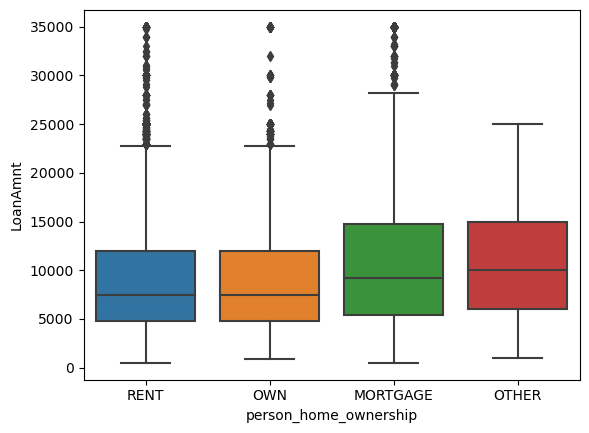

In [487]:
sns.boxplot(x='person_home_ownership', y ='LoanAmnt', data=df)
plt.show(sns)

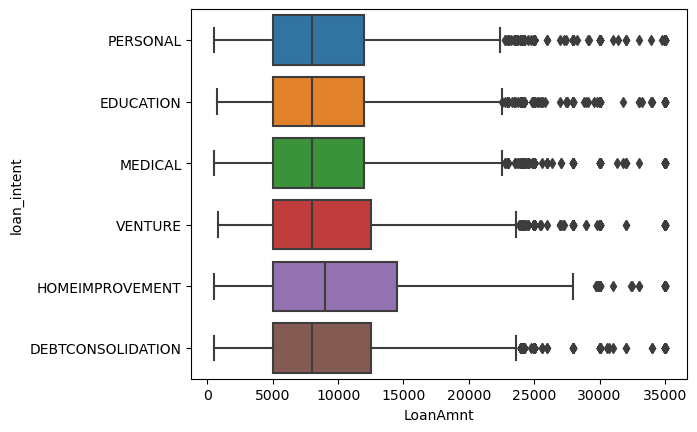

In [493]:
sns.boxplot(x='LoanAmnt', y ='loan_intent', data=df)
plt.show(sns)

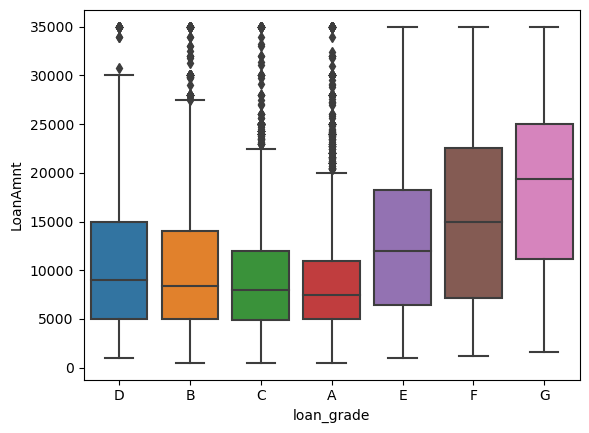

In [494]:
sns.boxplot(x='loan_grade', y ='LoanAmnt', data=df)
plt.show(sns)

## RESET-тест

In [495]:
model = smf.ols(data = df, formula = 'LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge').fit()
hat_y = model.predict()

In [496]:
hat_y

array([25979.93709318,  8404.42029741,  8389.80422653, ...,
        9568.83830971, 12111.10613909,  8267.55552277])

In [544]:
df['LoanAmnt2'] = pd.Series(model.predict()**2)
df['LoanAmnt3'] = pd.Series(model.predict()**3)
df['LoanAmnt4'] = pd.Series(model.predict()**4)
df

,PersonAge,PersonIncome,person_home_ownership,EmpLength,loan_intent,loan_grade,LoanAmnt,LoanInterestRate,loan_status,loan_percent_income,CredHist,PersonDefault,LoanAmnt2,LoanAmnt3,LoanAmnt4,res2,res
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,1,6.749571e+08,1.753534e+13,4.555671e+17,8.136153e+07,9020.062907
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,0,7.063428e+07,5.936402e+11,4.989202e+15,5.482544e+07,-7404.420297
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,0,7.038881e+07,5.905484e+11,4.954585e+15,8.350968e+06,-2889.804227
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,0,1.221606e+08,1.350196e+12,1.492321e+16,5.734766e+08,23947.371568
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,1,1.061393e+08,1.093488e+12,1.126555e+16,6.099718e+08,24697.608128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,0,NaN,NaN,NaN,1.573790e+07,-3967.101848
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,0,NaN,NaN,NaN,6.403934e+07,8002.458447
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,0,NaN,NaN,NaN,6.467440e+08,25431.161690
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,0,NaN,NaN,NaN,8.345708e+06,2888.893861


In [506]:
df.dropna()
df

,PersonAge,PersonIncome,person_home_ownership,EmpLength,loan_intent,loan_grade,LoanAmnt,LoanInterestRate,loan_status,loan_percent_income,CredHist,PersonDefault,LoanAmnt2,LoanAmnt3,LoanAmnt4
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,1,6.749571e+08,1.753534e+13,4.555671e+17
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,0,7.063428e+07,5.936402e+11,4.989202e+15
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,0,7.038881e+07,5.905484e+11,4.954585e+15
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,0,1.221606e+08,1.350196e+12,1.492321e+16
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,1,1.061393e+08,1.093488e+12,1.126555e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,0,NaN,NaN,NaN
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,0,NaN,NaN,NaN
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,0,NaN,NaN,NaN
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,0,NaN,NaN,NaN


In [508]:
model2=smf.ols(data=df,formula = 'LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge+LoanAmnt2+LoanAmnt3+LoanAmnt4').fit()
model2.params

Intercept             1.255231e-07
PersonDefault[T.1]   -1.667281e-05
PersonIncome          6.231445e-02
LoanInterestRate      1.343881e-06
CredHist              8.072679e-07
EmpLength             1.351356e-06
PersonAge             3.827281e-06
LoanAmnt2             7.380384e-05
LoanAmnt3            -2.026579e-09
LoanAmnt4             9.672559e-15
dtype: float64

In [509]:
R2_un = model2.rsquared
R2_re = model.rsquared

In [510]:
F_obs = (R2_un-R2_re)/(1-R2_un)*(len(df)-10)/3
F_obs.round(3)

-137.297

In [512]:
alpha=0.05
F_cr= stats.f.ppf (1-alpha, 3, len(df)-10)
F_cr

2.6051818269046954

$$H_0: \gamma_1=\gamma_2=\gamma_3=0$$
$$H_1: \gamma_1^2+\gamma_2^2+\gamma_3^2>0$$

$ F_{obs}<F_{cr} \Rightarrow H_O$  не отвергаем. Регрессия согласуется с данными

## Гетероскедастичность

In [513]:
model = smf.ols(data = df, formula = 'LoanAmnt~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge').fit()

### Проверим наличие гетероскедастичности с помощью теста Бройша-Пагана.
Построим вспомогательную регрессию, зависимой переменной в которой будут квадраты остатков исходной регрессии.

In [514]:
model.resid

0         9020.062907
1        -7404.420297
2        -2889.804227
3        23947.371568
4        24697.608128
             ...     
32576    -3967.101848
32577     8002.458447
32578    25431.161690
32579     2888.893861
32580    -1792.555523
Length: 28638, dtype: float64

In [515]:
df['res2']=model.resid**2
df['res']=model.resid
df

,PersonAge,PersonIncome,person_home_ownership,EmpLength,loan_intent,loan_grade,LoanAmnt,LoanInterestRate,loan_status,loan_percent_income,CredHist,PersonDefault,LoanAmnt2,LoanAmnt3,LoanAmnt4,res2,res
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,1,6.749571e+08,1.753534e+13,4.555671e+17,8.136153e+07,9020.062907
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,0,7.063428e+07,5.936402e+11,4.989202e+15,5.482544e+07,-7404.420297
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,0,7.038881e+07,5.905484e+11,4.954585e+15,8.350968e+06,-2889.804227
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,0,1.221606e+08,1.350196e+12,1.492321e+16,5.734766e+08,23947.371568
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,1,1.061393e+08,1.093488e+12,1.126555e+16,6.099718e+08,24697.608128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,0,NaN,NaN,NaN,1.573790e+07,-3967.101848
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,0,NaN,NaN,NaN,6.403934e+07,8002.458447
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,0,NaN,NaN,NaN,6.467440e+08,25431.161690
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,0,NaN,NaN,NaN,8.345708e+06,2888.893861


In [516]:
sub_model= smf.ols(data=df, formula='res2~PersonIncome+LoanInterestRate+CredHist+PersonDefault+EmpLength+PersonAge').fit()

In [517]:
np.round (len(df)*sub_model.rsquared,2)

13500.18

In [518]:
Hi2 = stats.chi2.ppf(1-0.05,6)
np.round(Hi2,2)

12.59

Тест указывает на гетероскедастичность.